In [48]:
# importar a base de dados

import pandas as pd

dataframe = pd.read_csv('advertising.csv')
display(dataframe)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [49]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [50]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

In [51]:
# correlão entre investimento em cada e como impacta nas vendas (de 0 a 1)
print(dataframe.corr())

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


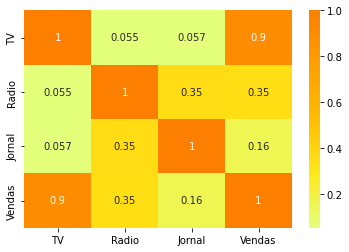

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# criar gráfico
sns.heatmap(dataframe.corr(), cmap='Wistia', annot=True)

# exibir gráfico
plt.show()

In [53]:
# treinar a IA para tentar adivinhar os valores de vendas dados os valores investidos em tv, rádio e jornal
# y quem eu quero prever (vendas)
# x quem eu vou usar pra fazer a previsao (valores investidos)

# Divisão da base de dados
x = dataframe[['TV', 'Radio', 'Jornal']]
y = dataframe['Vendas']

from sklearn.model_selection import train_test_split

# Dividir a base de dados em dados de treino (por onde a ia vai "estudar") 
# e teste (onde vamos verificar se ela aprendeu)
# test_size 30% dos dados serão para test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Escolhendo dois métodos para ensinar a IA (regressão linear e árvore de decisão)
model_LinearRegression = LinearRegression()
model_DecisionThree = RandomForestRegressor()

# treinando a IA
model_LinearRegression.fit(x_train, y_train)
model_DecisionThree.fit(x_train, y_train)

# fazer previsão nos testes 

prevision_LR = model_LinearRegression.predict(x_test)
prevision_DT = model_DecisionThree.predict(x_test)

# r² (r2_score) diz quanto a previsão chegou perto do resultado real 

from sklearn.metrics import r2_score

print(r2_score(y_test, prevision_LR))
print(r2_score(y_test, prevision_DT))

0.9015451130642929
0.962087535438144


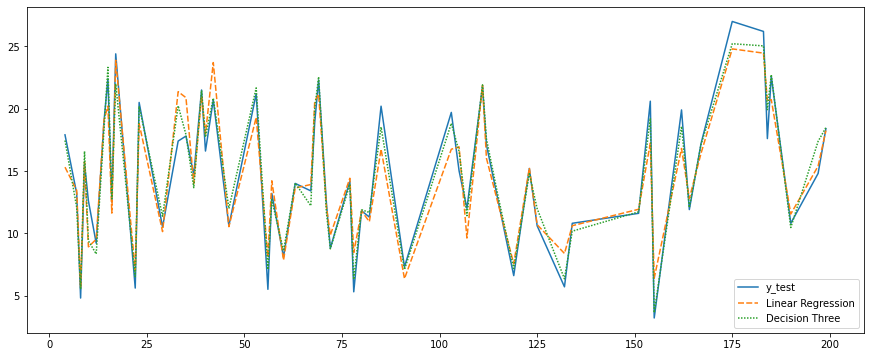

In [55]:
aux_dataframe = pd.DataFrame()
aux_dataframe['y_test'] = y_test
aux_dataframe['Linear Regression'] = prevision_LR
aux_dataframe['Decision Three'] = prevision_DT

plt.figure(figsize=(15,6))
sns.lineplot(data=aux_dataframe)
plt.show()

In [56]:
# Fazer uma nova previsão

new_data = pd.read_csv('novos.csv')
display(new_data)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [57]:
# utilizando o modelo de árvore de decisão (com mais acuracia) vamos fazer a predição dos novos valores
print(model_DecisionThree.predict(new_data))

[ 6.912  8.738 20.377]


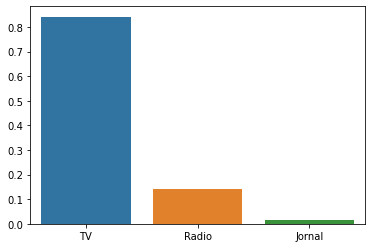

Radio     4652.8
Jornal    6110.8
dtype: float64


In [59]:
sns.barplot(x=x_train.columns, y=model_DecisionThree.feature_importances_)
plt.show()

print(dataframe[['Radio','Jornal']].sum())